In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

# Criando um conjunto de testes:

In [3]:
#Amostragem estratificada:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Neighborhood"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [4]:
strat_test_set["Neighborhood"].value_counts() / len(strat_test_set)

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.078767
Edwards    0.068493
Somerst    0.058219
Gilbert    0.054795
NWAmes     0.051370
Sawyer     0.051370
NridgHt    0.051370
BrkSide    0.041096
SawyerW    0.041096
Mitchel    0.034247
Crawfor    0.034247
NoRidge    0.027397
Timber     0.027397
IDOTRR     0.023973
ClearCr    0.020548
StoneBr    0.017123
SWISU      0.017123
BrDale     0.010274
Blmngtn    0.010274
MeadowV    0.010274
NPkVill    0.006849
Veenker    0.006849
Name: count, dtype: float64

In [5]:
df["Neighborhood"].value_counts() / len(df["Neighborhood"])

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: count, dtype: float64

In [6]:
dados = strat_train_set
dados

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
130,131,60,RL,88.0,14200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000
341,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
1106,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
1324,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,653,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,191000
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
140,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


# Exploração dados faltantes:

In [7]:
pd.set_option("display.max_columns", None)
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1923,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,440,440,GasA,TA,Y,FuseA,869,0,0,869,0,0,1,0,2,1,Fa,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
130,131,60,RL,88.0,14200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,2Story,7,6,1966,1966,Gable,CompShg,MetalSd,MetalSd,BrkFace,309.0,TA,TA,CBlock,TA,TA,No,Rec,445,Unf,0,479,924,GasA,Ex,Y,SBrkr,1216,941,0,2157,0,0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,1966.0,Fin,2,487,TA,TA,Y,105,66,0,0,0,0,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000
341,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,4,4,1950,1950,Gable,CompShg,Wd Sdng,AsbShng,NaN,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,721,721,GasA,Gd,Y,SBrkr,841,0,0,841,0,0,1,0,2,1,TA,4,Typ,0,NaN,CarPort,1950.0,Unf,1,294,TA,TA,N,250,0,24,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
1106,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,7,5,1990,1991,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,738,Unf,0,172,910,GasA,Gd,Y,SBrkr,1442,0,0,1442,1,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,1990.0,Fin,2,719,TA,TA,Y,0,244,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
1324,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,428.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1795,1795,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,895,TA,TA,Y,0,49,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000


In [8]:
dados.shape

(1168, 81)

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 976 to 188
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    957 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallCond 

---> Há dados faltantes em:

"LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond",
"BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt",
"GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"

In [10]:
#Tratar com médias as características numéricas contínuas:

from sklearn.impute import SimpleImputer

#funções tratamento dados faltantes:

def trat_dadosfaltantes_c_medias(df1, carac):
    imputer = SimpleImputer(strategy="median") #A classe SimpleImputer irá substituir os NA's das colunas que selecionamos
    imputer.fit(df1[carac])
    X = imputer.transform(df1[carac])
    
    X = pd.DataFrame(X, columns=carac)
#    df = df.drop(columns=carac)
#    df = pd.concat([df, X], axis=1)

    return X

def trat_dadosfaltantes_c_moda(df, carac):
    imputer = SimpleImputer(strategy="most_frequent") #A classe SimpleImputer irá substituir os NA's das colunas que selecionamos
    imputer.fit(df[carac])
    X = imputer.transform(df[carac])
    
    X = pd.DataFrame(X, columns=carac)
#    df = df.drop(columns=carac)
#    df = pd.concat([df, X], axis=1)

    return X

def trat_dadosfaltantes_c_NO(df, carac):
    imputer = SimpleImputer(strategy="constant", fill_value="No")
    imputer.fit(df[carac])
    X = imputer.transform(df[carac])
    
    X = pd.DataFrame(X, columns=carac)

    return X

In [11]:
#Tratar com média as características numéricas contínuas:
carac_num_cont = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
"1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", 
"EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

#Tratar com moda as seguintes características pois elas são numéricas discretas ou categóricas sem atributo NA:
carac_num_disc = ["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath",
                  "FullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", 
                  "MoSold", "YrSold"]

carac_cat_w_nbrs = ["MSSubClass"]

carac_cat_wo_nbrs_wo_na = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
                     "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle",
                     "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
                     "ExterCond", "Foundation", "Heating", "HeatingQC", "CentralAir", "Electrical",
                     "KitchenQual", "Functional", "PavedDrive", "SaleType", "SaleCondition", 
                     "KitchenAbvGr", "BedroomAbvGr"]

#Substituir por NA's as seguintes características:
carac_cat_wo_nbrs_w_na = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                          "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                          "PoolQC", "Fence", "MiscFeature"]

In [12]:
dados_labels = dados["SalePrice"]
dados_labels

976      85500
130     226000
341      82000
1106    179900
1324    147000
         ...  
652     191000
378     394432
1441    149300
140     115000
188     153337
Name: SalePrice, Length: 1168, dtype: int64

In [13]:
#Tratamento carac_num_cont:
dados_carac_num_cont = trat_dadosfaltantes_c_medias(dados, carac_num_cont)

#Tratamento carac_num_disc, carac_cat_w_nbrs, carac_cat_wo_nbrs_wo_na:
dados_carac_num_disc = trat_dadosfaltantes_c_moda(dados, carac_num_disc)
dados_carac_cat_w_nbrs = trat_dadosfaltantes_c_moda(dados, carac_cat_w_nbrs)
dados_carac_cat_wo_nbrs_wo_na = trat_dadosfaltantes_c_moda(dados, carac_cat_wo_nbrs_wo_na)

#Tratamento carac_cat_wo_nbrs_w_na:
dados_carac_cat_wo_nbrs_w_na = trat_dadosfaltantes_c_NO(dados, carac_cat_wo_nbrs_w_na)

In [14]:
dados = pd.concat([dados_carac_num_cont, dados_carac_num_disc, dados_carac_cat_w_nbrs,
                  dados_carac_cat_wo_nbrs_wo_na, dados_carac_cat_wo_nbrs_w_na], axis=1)
dados

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,KitchenAbvGr,BedroomAbvGr,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,51.0,5900.0,0.0,0.0,0.0,440.0,440.0,869.0,0.0,0.0,869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,1923.0,1958.0,0.0,0.0,1.0,0.0,4.0,0.0,2005.0,0.0,8.0,2006.0,30,RL,Pave,IR1,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,PConc,GasA,TA,Y,FuseA,Fa,Typ,Y,WD,Normal,1,2,No,Gd,TA,No,Unf,Unf,No,No,No,No,No,No,No,No
1,88.0,14200.0,309.0,445.0,0.0,479.0,924.0,1216.0,941.0,0.0,2157.0,487.0,105.0,66.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1966.0,1966.0,0.0,0.0,2.0,1.0,8.0,2.0,1966.0,2.0,5.0,2006.0,60,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,1,4,No,TA,TA,No,Rec,Unf,Gd,Attchd,Fin,TA,TA,No,GdPrv,No
2,60.0,8400.0,0.0,0.0,0.0,721.0,721.0,841.0,0.0,0.0,841.0,294.0,250.0,0.0,24.0,0.0,0.0,0.0,0.0,4.0,4.0,1950.0,1950.0,0.0,0.0,1.0,0.0,4.0,0.0,1950.0,1.0,9.0,2009.0,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,AsbShng,BrkFace,Fa,Fa,CBlock,GasA,Gd,Y,SBrkr,TA,Typ,N,WD,Normal,1,2,No,TA,Fa,No,Unf,Unf,No,CarPort,Unf,TA,TA,No,No,No
3,114.0,10357.0,0.0,738.0,0.0,172.0,910.0,1442.0,0.0,0.0,1442.0,719.0,0.0,244.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,1990.0,1991.0,1.0,0.0,2.0,0.0,6.0,1.0,1990.0,2.0,5.0,2007.0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,PConc,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Normal,1,3,No,Gd,TA,Mn,GLQ,Unf,TA,Attchd,Fin,TA,TA,No,No,No
4,75.0,9986.0,428.0,0.0,0.0,1795.0,1795.0,1795.0,0.0,0.0,1795.0,895.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,2006.0,2007.0,0.0,0.0,2.0,0.0,7.0,1.0,2007.0,3.0,2.0,2007.0,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,New,Partial,1,2,No,Ex,TA,Av,Unf,Unf,Gd,Attchd,RFn,TA,TA,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,70.0,8750.0,0.0,0.0,0.0,880.0,880.0,909.0,807.0,0.0,1716.0,512.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,1996.0,1996.0,0.0,0.0,2.0,1.0,7.0,1.0,1996.0,2.0,7.0,2009.0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,1,2,No,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,No,No,No
1164,88.0,11394.0,350.0,1445.0,0.0,411.0,1856.0,1856.0,0.0,0.0,1856.0,834.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,2010.0,2010.0,1.0,0.0,1.0,1.0,8.0,1.0,2010.0,3.0,6.0,2010.0,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Ex,Typ,Y,New,Partial,1,1,No,Ex,TA,Av,GLQ,Unf,Ex,Attchd,Fin,TA,TA,No,No,No
1165,70.0,4426.0,147.0,697.0,0.0,151.0,848.0,848.0,0.0,0.0,848.0,420.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,2004.0,2004.0,1.0,0.0,1.0,0.0,3.0,1.0,2004.0,2.0,5.0,2008.0,120,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1

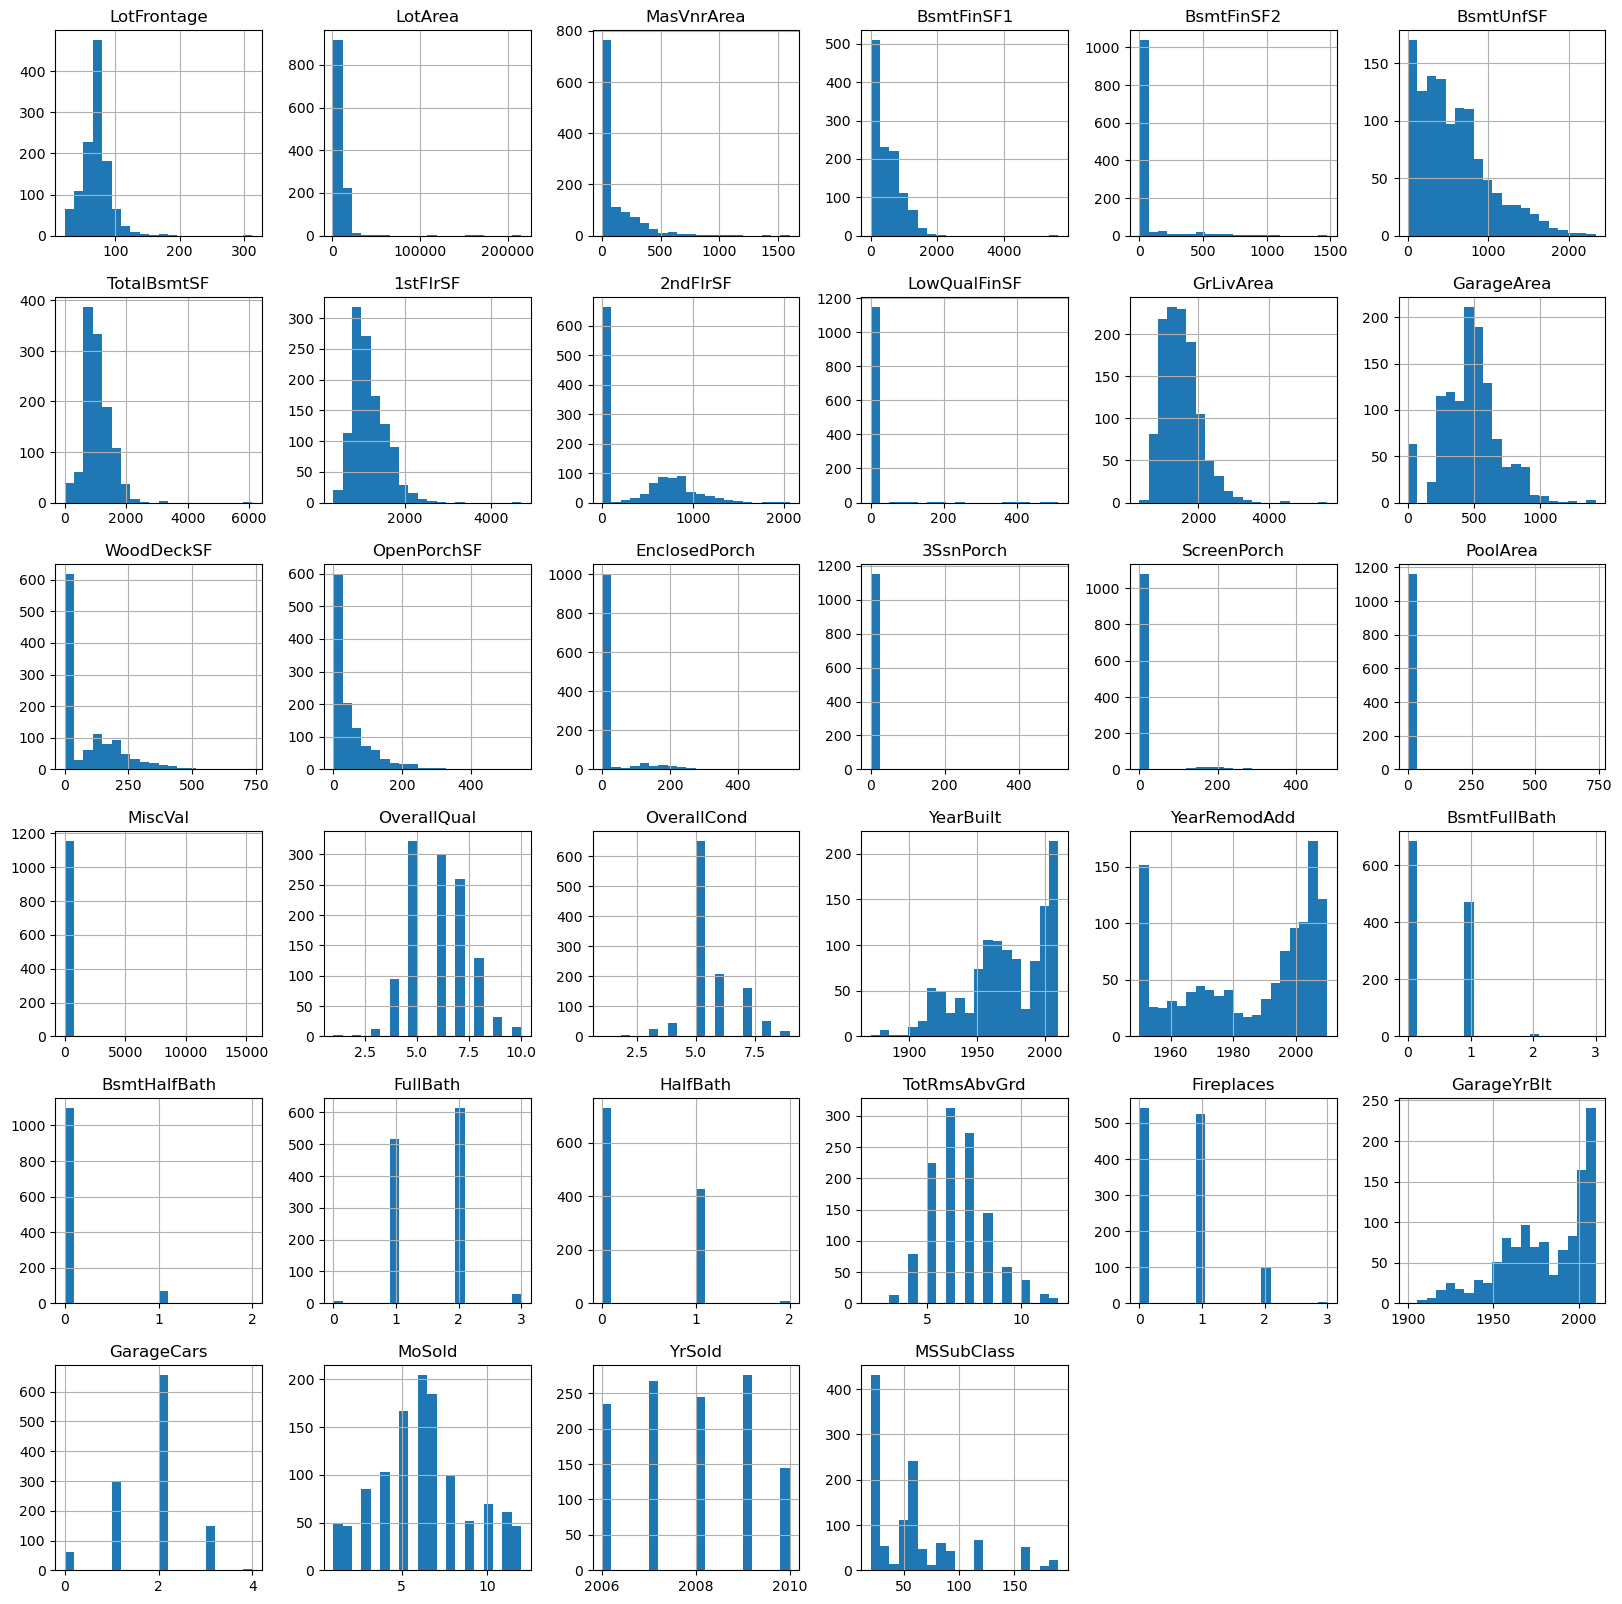

In [15]:
%matplotlib inline
dados.hist(bins=20, figsize=(20,20));

---> Excluir colunas:

Id: Não possue poder preditivo.


# Transformando características categóricas:

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1168 non-null   float64
 1   LotArea        1168 non-null   float64
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   float64
 4   BsmtFinSF2     1168 non-null   float64
 5   BsmtUnfSF      1168 non-null   float64
 6   TotalBsmtSF    1168 non-null   float64
 7   1stFlrSF       1168 non-null   float64
 8   2ndFlrSF       1168 non-null   float64
 9   LowQualFinSF   1168 non-null   float64
 10  GrLivArea      1168 non-null   float64
 11  GarageArea     1168 non-null   float64
 12  WoodDeckSF     1168 non-null   float64
 13  OpenPorchSF    1168 non-null   float64
 14  EnclosedPorch  1168 non-null   float64
 15  3SsnPorch      1168 non-null   float64
 16  ScreenPorch    1168 non-null   float64
 17  PoolArea       1168 non-null   float64
 18  MiscVal 

In [17]:
#A partir de MSZoning (Index:34) todas as características são categóricas.
from sklearn.preprocessing import LabelEncoder


def encoder (dados):
    labelencoder = LabelEncoder()

    df_cat = dados.iloc[:,34:].values
    df_num = dados.iloc[:,:34].values

    for x in range(45):
        df_cat[:, x] = labelencoder.fit_transform(df_cat[:, x])
    
    df_cat_columns = dados.iloc[:,34:].columns.tolist()
    df_cat = pd.DataFrame(df_cat, columns=df_cat_columns)
    
    df_num_columns = dados.iloc[:,:34].columns.tolist()
    df_num = pd.DataFrame(df_num, columns=df_num_columns)
    
    df = pd.concat([df_num, df_cat], axis=1)

    return df, df_num, df_cat

In [18]:
dados, dados_num, dados_cat = encoder(dados)
dados

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,KitchenAbvGr,BedroomAbvGr,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,51.0,5900.0,0.0,0.0,0.0,440.0,440.0,869.0,0.0,0.0,869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,1923.0,1958.0,0.0,0.0,1.0,0.0,4.0,0.0,2005.0,0.0,8.0,2006.0,30.0,3,1,0,0,0,4,0,3,2,2,0,2,1,1,13,13,1,3,3,2,0,3,1,0,1,6,2,8,4,1,2,1,2,4,3,6,6,3,6,1,3,3,3,4,1
1,88.0,14200.0,309.0,445.0,0.0,479.0,924.0,1216.0,941.0,0.0,2157.0,487.0,105.0,66.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1966.0,1966.0,0.0,0.0,2.0,1.0,8.0,2.0,1966.0,2.0,5.0,2006.0,60.0,3,1,3,3,0,0,0,12,2,2,0,5,1,1,8,8,1,3,3,1,0,0,1,4,2,6,2,8,4,1,4,1,4,4,3,5,6,2,1,0,5,5,3,0,1
2,60.0,8400.0,0.0,0.0,0.0,721.0,721.0,841.0,0.0,0.0,841.0,294.0,250.0,0.0,24.0,0.0,0.0,0.0,0.0,4.0,4.0,1950.0,1950.0,0.0,0.0,1.0,0.0,4.0,0.0,1950.0,1.0,9.0,2009.0,20.0,2,1,3,3,0,4,0,20,1,2,0,2,1,1,13,0,1,1,1,1,0,2,1,4,3,6,0,8,4,1,2,1,4,0,3,6,6,3,4,3,5,5,3,4,1
3,114.0,10357.0,0.0,738.0,0.0,172.0,910.0,1442.0,0.0,0.0,1442.0,719.0,0.0,244.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,1990.0,1991.0,1.0,0.0,2.0,0.0,6.0,1.0,1990.0,2.0,5.0,2007.0,20.0,3,1,0,3,0,0,0,20,1,2,0,2,3,1,6,6,1,2,3,2,0,2,1,4,2,6,2,8,4,1,3,1,2,4,2,2,6,5,1,0,5,5,3,4,1
4,75.0,9986.0,428.0,0.0,0.0,1795.0,1795.0,1795.0,0.0,0.0,1795.0,895.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,2006.0,2007.0,0.0,0.0,2.0,0.0,7.0,1.0,2007.0,3.0,2.0,2007.0,20.0,3,1,3,3,0,4,0,21,2,2,0,2,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,6,5,1,2,1,0,4,0,6,6,2,1,2,5,5,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,70.0,8750.0,0.0,0.0,0.0,880.0,880.0,909.0,807.0,0.0,1716.0,512.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,1996.0,1996.0,0.0,0.0,2.0,1.0,7.0,1.0,1996.0,2.0,7.0,2009.0,60.0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,8,4,1,2,1,2,4,3,6,6,5,1,2,5,5,3,4,1
1164,88.0,11394.0,350.0,1445.0,0.0,411.0,1856.0,1856.0,0.0,0.0,1856.0,834.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,2010.0,2010.0,1.0,0.0,1.0,1.0,8.0,1.0,2010.0,3.0,6.0,2010.0,20.0,3,1,3,3,0,0,0,22,2,2,0,2,3,1,12,12,2,2,3,2,0,0,1,4,0,6,2,6,5,1,1,1,0,4,0,2,6,0,1,0,5,5,3,4,1
1165,70.0,4426.0,147.0,697.0,0.0,151.0,848.0,848.0,0.0,0.0,848.0,420.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,2004.0,2004.0,1.0,0.0,1.0,0.0,3.0,1.0,2004.0,2.0,5.0,2008.0,120.0,4,1,3,3,0,4,0,5,2,2,4,2,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,8,4,1,1,1,2,4,0,2,6,5,1,2,5,5,3,4,1
1166,70.0,10500.0,0.0,432.0,0.0,432.0,864.0,864.0,0.0,0.0,864.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,1971.0,1971.0,0.0,0.0,1.0,0.0,5.0,1.0,2005.0,0.0,4.0,2010.0,20.0,3,1,3,3,0,2,0,12,2,2,0,2,1,1,6,6,1,3,3,1,0,3,1,4,3,6,2,4,4,1,3,1,4,4,3,0,6,4,6,1,3,3,3,4,1


In [19]:
dados_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,KitchenAbvGr,BedroomAbvGr,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,3,1,0,0,0,4,0,3,2,2,0,2,1,1,13,13,1,3,3,2,0,3,1,0,1,6,2,8,4,1,2,1,2,4,3,6,6,3,6,1,3,3,3,4,1
1,3,1,3,3,0,0,0,12,2,2,0,5,1,1,8,8,1,3,3,1,0,0,1,4,2,6,2,8,4,1,4,1,4,4,3,5,6,2,1,0,5,5,3,0,1
2,2,1,3,3,0,4,0,20,1,2,0,2,1,1,13,0,1,1,1,1,0,2,1,4,3,6,0,8,4,1,2,1,4,0,3,6,6,3,4,3,5,5,3,4,1
3,3,1,0,3,0,0,0,20,1,2,0,2,3,1,6,6,1,2,3,2,0,2,1,4,2,6,2,8,4,1,3,1,2,4,2,2,6,5,1,0,5,5,3,4,1
4,3,1,3,3,0,4,0,21,2,2,0,2,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,6,5,1,2,1,0,4,0,6,6,2,1,2,5,5,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,8,4,1,2,1,2,4,3,6,6,5,1,2,5,5,3,4,1
1164,3,1,3,3,0,0,0,22,2,2,0,2,3,1,12,12,2,2,3,2,0,0,1,4,0,6,2,6,5,1,1,1,0,4,0,2,6,0,1,0,5,5,3,4,1
1165,4,1,3,3,0,4,0,5,2,2,4,2,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,8,4,1,1,1,2,4,0,2,6,5,1,2,5,5,3,4,1
1166,3,1,3,3,0,2,0,12,2,2,0,2,1,1,6,6,1,3,3,1,0,3,1,4,3,6,2,4,4,1,3,1,4,4,3,0,6,4,6,1,3,3,3,4,1


# Verificação correlações:

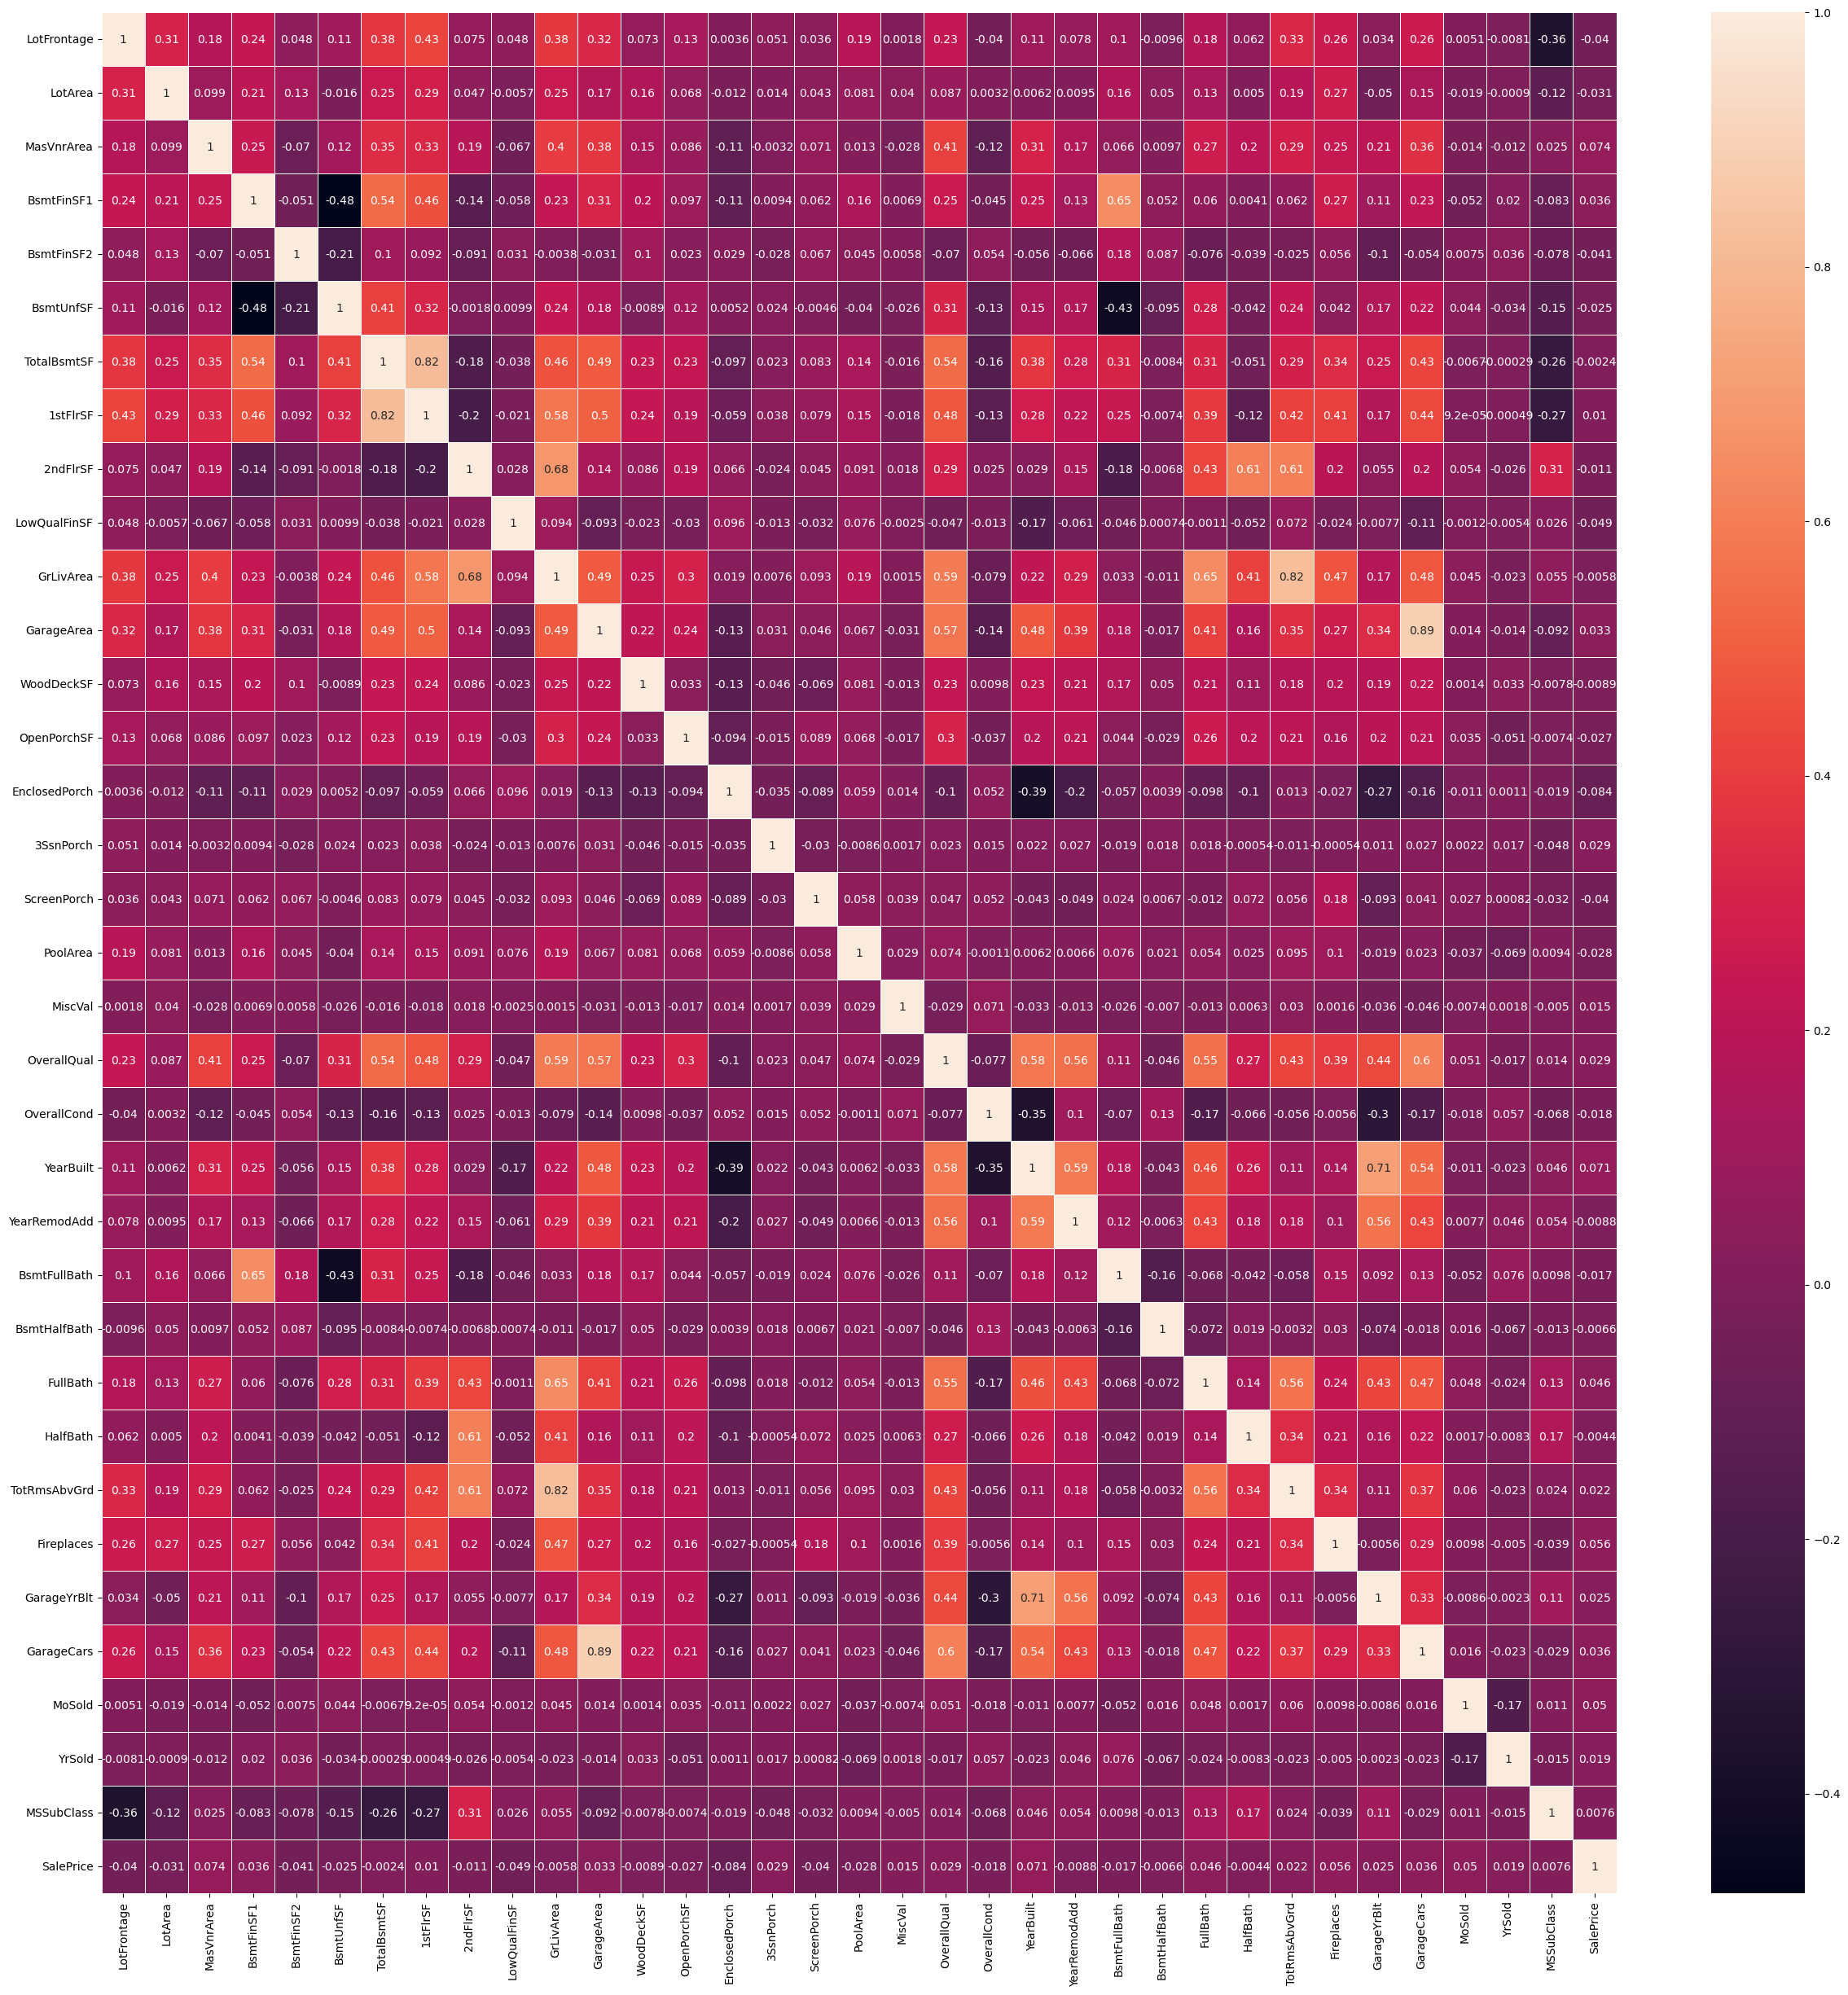

In [20]:
# Dados numéricos:
dados_num = pd.concat([dados_num, dados_labels], axis=1)
correlation_num = dados_num.corr()
f, ax = plt.subplots(figsize=(30,30))
srn.heatmap(correlation_num, annot=True, linewidth=0.5);

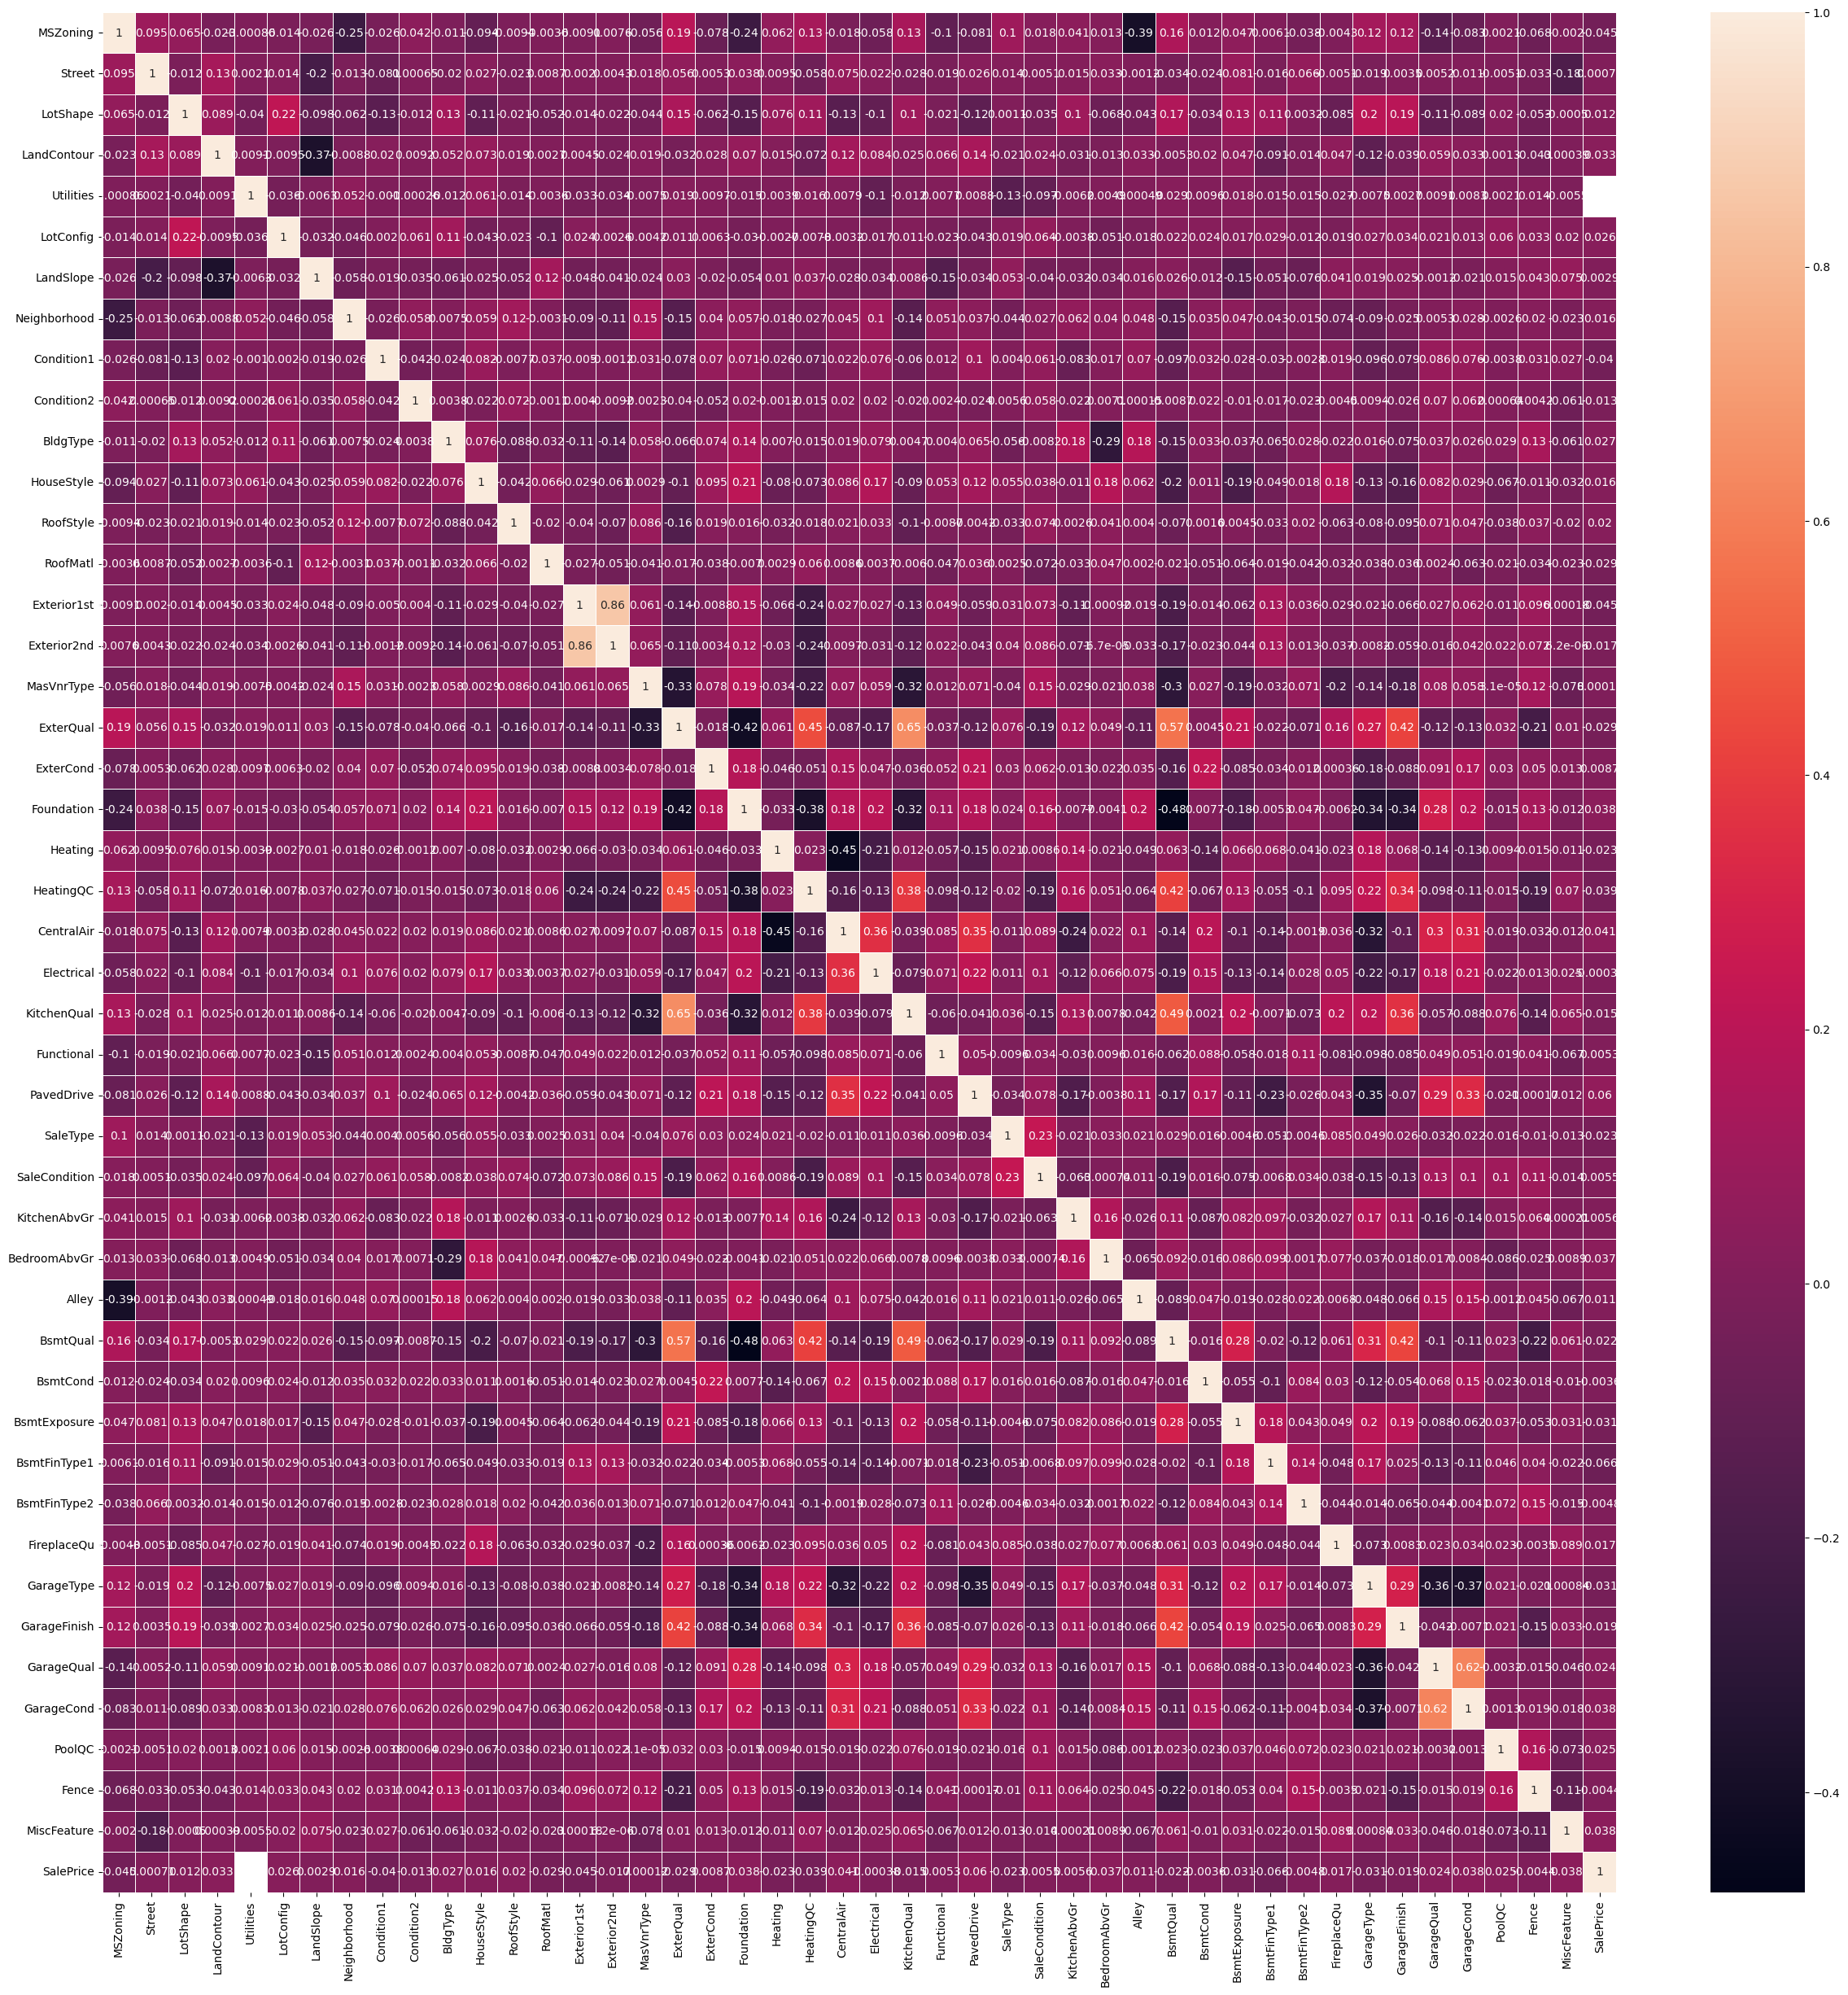

In [21]:
# Dados categóricos:
dados_cat = pd.concat([dados_cat, dados_labels], axis=1)
correlation_cat = dados_cat.corr()
f, ax = plt.subplots(figsize=(30,30))
srn.heatmap(correlation_cat, annot=True, linewidth=0.5);

Não há correlações lineares fortes entre nenhum característica com SalePrice!
Mas há muitas caracterítiscas correlacionadas fortemente!

# Escalonamento de características:

In [22]:
from sklearn.preprocessing import MinMaxScaler

def scaler(dados):
    
    dados_num = dados.iloc[:,:34]
    dados_num_columns = dados.iloc[:,:34].columns.tolist()
    dados_cat = dados.iloc[:,34:]
    
    scaler = MinMaxScaler()
    dados_num = scaler.fit_transform(dados_num)
    
    dados_num = pd.DataFrame(dados_num, columns=dados_num_columns)
    dados = pd.concat([dados_num, dados_cat], axis=1)
    
    return dados
    

In [23]:
dados = scaler(dados)
dados

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,KitchenAbvGr,BedroomAbvGr,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,0.102740,0.021501,0.000000,0.000000,0.0,0.188356,0.072013,0.122763,0.000000,0.0,0.100791,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.750,0.369565,0.133333,0.000000,0.0,0.333333,0.0,0.2,0.000000,0.954545,0.00,0.636364,0.00,0.058824,3,1,0,0,0,4,0,3,2,2,0,2,1,1,13,13,1,3,3,2,0,3,1,0,1,6,2,8,4,1,2,1,2,4,3,6,6,3,6,1,3,3,3,4,1
1,0.229452,0.060296,0.193125,0.078845,0.0,0.205051,0.151227,0.202386,0.455690,0.0,0.343444,0.343441,0.142663,0.120658,0.000000,0.0,0.0,0.0,0.0,0.666667,0.625,0.681159,0.266667,0.000000,0.0,0.666667,0.5,0.6,0.666667,0.600000,0.50,0.363636,0.00,0.235294,3,1,3,3,0,0,0,12,2,2,0,5,1,1,8,8,1,3,3,1,0,0,1,4,2,6,2,8,4,1,4,1,4,4,3,5,6,2,1,0,5,5,3,0,1
2,0.133562,0.033186,0.000000,0.000000,0.0,0.308647,0.118003,0.116338,0.000000,0.0,0.095516,0.207334,0.339674,0.000000,0.043478,0.0,0.0,0.0,0.0,0.333333,0.375,0.565217,0.000000,0.000000,0.0,0.333333,0.0,0.2,0.000000,0.454545,0.25,0.727273,0.75,0.000000,2,1,3,3,0,4,0,20,1,2,0,2,1,1,13,0,1,1,1,1,0,2,1,4,3,6,0,8,4,1,2,1,4,0,3,6,6,3,4,3,5,5,3,4,1
3,0.318493,0.042333,0.000000,0.130758,0.0,0.073630,0.148936,0.254245,0.000000,0.0,0.208742,0.507052,0.000000,0.446069,0.000000,0.0,0.0,0.0,0.0,0.666667,0.500,0.855072,0.683333,0.333333,0.0,0.666667,0.0,0.4,0.333333,0.818182,0.50,0.363636,0.25,0.000000,3,1,0,3,0,0,0,20,1,2,0,2,3,1,6,6,1,2,3,2,0,2,1,4,2,6,2,8,4,1,3,1,2,4,2,2,6,5,1,0,5,5,3,4,1
4,0.184932,0.040599,0.267500,0.000000,0.0,0.768408,0.293781,0.335246,0.000000,0.0,0.275245,0.631171,0.000000,0.089580,0.000000,0.0,0.0,0.0,0.0,0.777778,0.500,0.971014,0.950000,0.000000,0.0,0.666667,0.0,0.5,0.333333,0.972727,0.75,0.090909,0.25,0.000000,3,1,3,3,0,4,0,21,2,2,0,2,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,6,5,1,2,1,0,4,0,6,6,2,1,2,5,5,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.167808,0.034822,0.000000,0.000000,0.0,0.376712,0.144026,0.131941,0.390799,0.0,0.260362,0.361072,0.000000,0.219378,0.000000,0.0,0.0,0.0,0.0,0.666667,0.500,0.898551,0.766667,0.000000,0.0,0.666667,0.5,0.5,0.333333,0.872727,0.50,0.545455,0.75,0.235294,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,8,4,1,2,1,2,4,3,6,6,5,1,2,5,5,3,4,1
1164,0.229452,0.047180,0.218750,0.256024,0.0,0.175942,0.303764,0.349243,0.000000,0.0,0.286737,0.588152,0.153533,0.000000,0.000000,0.0,0.0,0.0,0.0,0.888889,0.125,1.000000,1.000000,0.333333,0.0,0.333333,0.5,0.6,0.333333,1.000000,0.75,0.454545,1.00,0.000000,3,1,3,3,0,0,0,22,2,2,0,2,3,1,12,12,2,2,3,2,0,0,1,4,0,6,2,6,5,1,1,1,0,4,0,2,6,0,1,0,5,5,3,4,1
1165,0.167808,0.014611,0.091875,0.123494,0.0,0.064640,0.138789,0.117944,0.000000,0.0,0.096835,0.296192,0.202446,0.000000,0.000000,0.0,0.0,0.0,0.0,0.555556,0.500,0.956522,0.900000,0.333333,0.0,0.333333,0.0,0.1,0.333333,0.945455,0.50,0.363636,0.50,0.588235,4,1,3,3,0,4,0,5,2,2,4,2,1,1,12,12,1,2,3,2,0,0,1,4,2,6,2,8,4,1,1,1,2,4,0,2,6,5,1,2,5,5,3,4,1
1166,0.167808,0.043002,0.000000,0.076541,0.0,0.184932,0.141408,0.121615,0.00

# Treinamento Regressão Linear Multipla:

In [24]:
from sklearn.linear_model import LinearRegression
import os

lin_reg = LinearRegression()
lin_reg.fit(dados, dados_labels)

LinearRegression()

In [25]:
import joblib

joblib.dump(lin_reg, "lin_reg.pkl")

['lin_reg.pkl']

In [26]:
predictions_lin = lin_reg.predict(dados)
predictions_lin

array([106496.74808173, 224131.68051836,  77313.9604431 , ...,
       155321.53993403,  91511.22864777, 141988.13691604])

In [27]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(dados_labels, predictions_lin)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

30013.408113295256

In [28]:
#Validação cruzada para o modelo de regressão linear:
from sklearn.model_selection import cross_val_score

scores_lin = cross_val_score(lin_reg, dados, dados_labels,
                             scoring="neg_mean_squared_error", cv=3)
lin_rmse_score_2 = np.sqrt(-scores_lin)
lin_rmse_score_2

array([3.04388032e+04, 1.24998545e+13, 3.16003522e+04])

In [29]:
lin_rmse_score_2.mean()

4166618192088.129

In [30]:
lin_rmse_score_2.std()

5892487912613.19

# Treinamento Regressão Árvore:

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(dados, dados_labels)

DecisionTreeRegressor()

In [32]:
joblib.dump(tree_reg, "tree_reg.pkl")

['tree_reg.pkl']

In [33]:
predictions_tree = tree_reg.predict(dados)
predictions_tree

array([ 85500., 226000.,  82000., ..., 149300., 115000., 153337.])

In [34]:
tree_mse = mean_squared_error(dados_labels, predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#O modelo de regressão árvore está sobreajustado!

0.0

In [35]:
#Validação cruzada para o modelo de regressão árvore:

scores_tree = cross_val_score(tree_reg, dados, dados_labels,
                             scoring="neg_mean_squared_error", cv=3)
tree_rmse_score = np.sqrt(-scores_tree)
tree_rmse_score

array([40649.80758046, 47576.19556925, 38935.59894143])

In [36]:
tree_rmse_score.mean()

42387.20069704517

In [37]:
tree_rmse_score.std()

3735.3160198592764

# Treinamento RandomForest:

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(dados, dados_labels)

RandomForestRegressor()

In [39]:
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [40]:
predictions_forest = tree_reg.predict(dados)
predictions_forest

array([ 85500., 226000.,  82000., ..., 149300., 115000., 153337.])

In [41]:
forest_mse = mean_squared_error(dados_labels, predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [42]:
scores_forest = cross_val_score(forest_reg, dados, dados_labels,
                                scoring="neg_mean_squared_error", cv=3)
forest_rmse_score = np.sqrt(-scores_forest)
forest_rmse_score

array([27685.69943247, 35562.95558651, 26952.946577  ])

In [43]:
forest_rmse_score.mean()

30067.20053199014

In [44]:
forest_rmse_score.std()

3897.5825329073045

# Aperfeiçoamento RandomForest:

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30, 50, 100], "max_features": [10, 20, 40, 60]}
]

In [46]:
forest_reg = RandomForestRegressor()

In [47]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [48]:
grid_search.fit(dados, dados_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 20, 40, 60],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'max_features': 40, 'n_estimators': 50}

In [50]:
best_params = grid_search.best_params_
best_params

{'max_features': 40, 'n_estimators': 50}

In [51]:
forest_reg_improved = RandomForestRegressor(max_features=best_params["max_features"], n_estimators=best_params["n_estimators"])
forest_reg_improved.fit(dados, dados_labels)

RandomForestRegressor(max_features=40, n_estimators=50)

In [52]:
predictions_forest_improved = forest_reg_improved.predict(dados)
predictions_forest_improved

array([ 86325.42, 221980.  ,  86657.66, ..., 145884.  , 107666.66,
       149802.14])

In [53]:
scores_forest_improved = cross_val_score(forest_reg_improved, dados, dados_labels,
                                scoring="neg_mean_squared_error", cv=3)
forest_improved_rmse_score = np.sqrt(-scores_forest_improved)
forest_improved_rmse_score

array([26417.23895858, 33793.12782098, 25871.72104609])

In [54]:
forest_improved_rmse_score.mean()
# Melhora de 4.4p.p. em relação ao modelo com hiperparâmetros padrão

28694.029275215715

In [55]:
forest_improved_rmse_score.std()

3612.4785519804414